## Chapter 4: Pandas Guidebook
***


### §4.1 Packages

It makes a Python program unmaintainable if there are too many variables and functions in a single file. Through grouping functions into different modules, each file can have fewer codes. In Python, each `.py` file can be regarded as a `module`.

In order to prevent conflicts between modules, Python provides `package` to organize modules.

For example, there are two modules, and both of them are called `mod`, but if they are in differnt packages, `packageone` and `packagetwo`, then it is totally fine. They can be identified as `packageone.mod` and `packagetwo.mod`:

```
packageone
    ├─ __init__.py
    └─ mod.py

packagetwo
    ├─ __init__.py
    └─ mod.py
```

Every package directory has a `__init__.py`, otherwise, Python will regard this directory as a normal folder instead of a package. `__init__` can be an empty file.  
Package can be nested, like the following directory structure:

```
mypackage
    │
    ├─ innerpackage
    │    ├─ __init__.py
    │    ├─ one.py
    │    └─ two.py
    │
    ├─ __init__.py
    └─ mod.py
```

`one.py`'s module name is `mypackage.innerpackage.one`.  
The Python file for module `mypackage.innerpackage` is `__init__.py` in `mypackage/innerpackage`.

> Note:  
The names of self created modules should never conflict with system modules, such as `os`, `sys`.


In [1]:
import sys
!{sys.executable} -m pip install pandas

### §4.2 Regular Imports
To use a certain module/package in our code, we can simply import it at the beginning of our codes:

In [2]:
import math

result = math.factorial(5)
print(result)

120


We can import multiple modules in one line:

In [3]:
import math, time

We can also rename the package/module imported:

In [4]:
import numpy as np

np.average([1,2,3,4])

2.5

Sometimes we may just want to import a certain part of a module or library:

In [5]:
from math import sqrt
sqrt(9)

3.0

In [6]:
import math
math.sqrt(9)

3.0

You can check the function documentations using `?`

In [7]:
math.sqrt?

You can also import everything from a package/module using `*` (this manner is usually not recommended):

In [8]:
from math import *

The built-in function dir() is used to find out which names a module defines. It returns a sorted list of strings

In [9]:
import sys
dir(sys)

['__breakpointhook__',
 '__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_framework',
 '_getframe',
 '_git',
 '_home',
 '_xoptions',
 'abiflags',
 'api_version',
 'argv',
 'base_exec_prefix',
 'base_prefix',
 'breakpointhook',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'callstats',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_asyncgen_hooks',
 'get_coroutine_origin_tracking_depth',
 'get_coroutine_wrapper',
 'getallocatedblocks',
 'getcheckinterval',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencodeerrors',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'getswitchinterval',
 'gettrace',
 'hash_inf

### §4.3 Pandas intro

Pandas is an open-source Python library for performing highly specialized data analysis. Pandas is built on top of the NumPy package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in SciPy, plotting functions from Matplotlib, and machine learning algorithms in Scikit-learn.

- It provides a single library for data analyst to easily process data, extract data and manipulate data.
- Pandas provides two new data structures: Series and DataFrame.
- The new data structures provide data manipulation capability equivalent to SQL-based relational database within Python


In [10]:
!pip install pandas 
import pandas as pd

#### Create Series

Creating a Series by passing a list of values, letting pandas create a default integer index.
The default index starts from 0.

In [11]:
s = pd.Series([1, 3, 5, 4, 6, 8])
print(s)

0    1
1    3
2    5
3    4
4    6
5    8
dtype: int64


#### Create Dataframe

You can create a DataFrame by passing a NumPy array, with an index and labeled columns:

In [12]:
import numpy as np
import pandas as pd
df = pd.DataFrame(
            {
               "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
               "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"])
           }
       )

print(df)

        one       two
a -0.552916 -0.251897
b  0.454400 -0.060859
c  0.586018 -0.445856
d       NaN  1.348235


In [14]:
df = pd.DataFrame(np.random.randn(6, 4), columns=list("ABCD"))
print(df)

          A         B         C         D
0 -1.581045  0.459942  0.011486 -0.445368
1 -0.905698 -1.308065 -0.609283  2.135465
2 -1.023176  0.751299  1.424900 -0.148444
3 -0.754882 -2.602260 -0.062776  1.305434
4 -0.631045 -3.432989  0.744179 -0.105129
5  1.147634 -0.947234  0.080023  1.733648


You can create a DataFrame by passing a dict of objects that can be converted to series-like.

In [17]:
df2 = pd.DataFrame(
                {
                "A": 1.0,
                "B": pd.Timestamp("20210402"),
                "C": pd.Series(1, index=list(range(4)), dtype="float32"),
                "D": np.array([3] * 4, dtype="int32"),
                "E": pd.Categorical(["test", "train", "test", "train"]),
                "F": "foo",
            }
        )
print(df2)

     A          B    C  D      E    F
0  1.0 2021-04-02  1.0  3   test  foo
1  1.0 2021-04-02  1.0  3  train  foo
2  1.0 2021-04-02  1.0  3   test  foo
3  1.0 2021-04-02  1.0  3  train  foo


We can get the dataframe information by **df.info()**, **df.describe()**, which shows a quick statistic summary of your data:

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 260.0+ bytes


In [26]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


### §4.4 View Data

We can view the top and bottom rows of the frame using **head()**, **tail()**

In [23]:
df.head() #default top 5 rows

,A,B,C,D
0,-1.581045,0.459942,0.011486,-0.445368
1,-0.905698,-1.308065,-0.609283,2.135465
2,-1.023176,0.751299,1.424900,-0.148444
3,-0.754882,-2.602260,-0.062776,1.305434
4,-0.631045,-3.432989,0.744179,-0.105129


In [22]:
df.tail(2)

,A,B,C,D
4,-0.631045,-3.432989,0.744179,-0.105129
5,1.147634,-0.947234,0.080023,1.733648


We can view the dataframe index and columns, data types, data shape

In [69]:
# index
print(df.index)

# column names
print(df.columns)

# data types
print(df.dtypes)

# shape
print(df.shape)

RangeIndex(start=0, stop=6, step=1)
Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
A    float64
B    float64
C    float64
D    float64
E     object
dtype: object
(6, 5)


### §4.5 Slicing & Indexing

There are different ways to do [slicing & indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing). It will be used a lot to get and set subsets of pandas objects.

- [ ]: indexing with [] (a.k.a. __getitem__ for those familiar with implementing class behavior in Python) is selecting out lower-dimensional slices.
- .loc: `.loc` is primarily label based, but may also be used with a boolean array. `.loc` will raise `KeyError` when the items are not found.
    1. A single label, e.g. `5` or `'a'` (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.).

    2. A list or array of labels `['a', 'b', 'c']`.

    3. A slice object with labels `'a':'f'` (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index! See Slicing with labels and Endpoints are inclusive.)

    4. A boolean array (any NA values will be treated as False).

    5. A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above) 
- .iloc: `.iloc` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. 
    1. An integer e.g. `5`.

    2. A list or array of integers `[4, 3, 0]`.

    3. A slice object with ints `1:7`.

    4. A boolean array (any NA values will be treated as False).

    5. A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).
- .at: similarly to `loc`, `at` provides label based scalar lookups
- .iat: similarly to `iloc`, `iat` provides integer based scalar lookups
- .isin: we can select rows from a DataFrame using a boolean vector. `isin()` method can return a boolean vector.
- .where: It is similar to .isin method. where can return a boolean vector.

In [27]:
df["A"] # select the column A

0   -1.581045
1   -0.905698
2   -1.023176
3   -0.754882
4   -0.631045
5    1.147634
Name: A, dtype: float64

In [30]:
df[0:2] # select the first 2 rows

,A,B,C,D
0,-1.581045,0.459942,0.011486,-0.445368
1,-0.905698,-1.308065,-0.609283,2.135465


In [31]:
df.loc[:, ["A", "B"]] # select all rows in column A, column B

,A,B
0,-1.581045,0.459942
1,-0.905698,-1.308065
2,-1.023176,0.751299
3,-0.754882,-2.602260
4,-0.631045,-3.432989
5,1.147634,-0.947234


In [46]:
df2.loc[1:2, ["A", "B"]] # the 2nd and 3rd row in column A and column B

,A,B
1,1.0,2021-04-02
2,1.0,2021-04-02


In [47]:
df.iloc[3] # the 4th row 

A   -0.754882
B   -2.602260
C   -0.062776
D    1.305434
Name: 3, dtype: float64

In [48]:
df.iloc[1:3, :] # 2nd and 3rd row in all columns

,A,B,C,D
1,-0.905698,-1.308065,-0.609283,2.135465
2,-1.023176,0.751299,1.424900,-0.148444


In [49]:
df.iat[1, 1] # the 2nd row, 2nd column value

-1.3080652899656589

In [50]:
df[df["A"] > 0] # use boolean index to filter the dataframe

,A,B,C,D
5,1.147634,-0.947234,0.080023,1.733648


In [51]:
df[df > 0]

,A,B,C,D
0,NaN,0.459942,0.011486,NaN
1,NaN,NaN,NaN,2.135465
2,NaN,0.751299,1.424900,NaN
3,NaN,NaN,NaN,1.305434
4,NaN,NaN,0.744179,NaN
5,1.147634,NaN,0.080023,1.733648


Use the isin() method for filtering:

In [52]:
df["E"] = ["one", "one", "two", "three", "four", "three"] # new column is added to the dataframe.

In [53]:
df

,A,B,C,D,E
0,-1.581045,0.459942,0.011486,-0.445368,one
1,-0.905698,-1.308065,-0.609283,2.135465,one
2,-1.023176,0.751299,1.424900,-0.148444,two
3,-0.754882,-2.602260,-0.062776,1.305434,three
4,-0.631045,-3.432989,0.744179,-0.105129,four
5,1.147634,-0.947234,0.080023,1.733648,three


In [54]:
df[df["E"].isin(["two", "four"])]

,A,B,C,D,E
2,-1.023176,0.751299,1.424900,-0.148444,two
4,-0.631045,-3.432989,0.744179,-0.105129,four


In [56]:
df.where(df['B'] > 0) # which is equal to df[df['B'] < 0]

,A,B,C,D,E
0,-1.581045,0.459942,0.011486,-0.445368,one
1,NaN,NaN,NaN,NaN,NaN
2,-1.023176,0.751299,1.424900,-0.148444,two
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


### §4.6 Operations

- `sum()`: Aggregation function that gives the total sum of a column

- `mean()`: Aggregation function that gives the average value of a column

- `std()`: Aggregation function that gives the standard deviation value of a column

- `count()`: Counts the number of fill rows in the columns, where empty rows are ignored.

- `unique()`: Similar to set(), but only works for Series object, i.e `data[‘Age’]`

- `nunique()`: Much like unique(), except it counts the number of unique elements in the Series.

- `value_counts()`: Counting duplicated values


In [61]:
df.mean() # get mean value 

A   -0.624702
B   -1.179885
C    0.264755
D    0.745934
dtype: float64

In [62]:
df.mean(1)

0   -0.388746
1   -0.171895
2    0.251145
3   -0.528621
4   -0.856246
5    0.503518
dtype: float64

In [71]:
df['E'].nunique() # number of unique values in column E

4

In [66]:
df['E'].value_counts()

three    2
one      2
four     1
two      1
Name: E, dtype: int64

In [63]:
df.apply(np.cumsum)

,A,B,C,D,E
0,-1.581045,0.459942,0.011486,-0.445368,one
1,-2.486743,-0.848123,-0.597797,1.690096,oneone
2,-3.509919,-0.096824,0.827103,1.541653,oneonetwo
3,-4.264801,-2.699084,0.764327,2.847087,oneonetwothree
4,-4.895846,-6.132073,1.508506,2.741957,oneonetwothreefour
5,-3.748212,-7.079307,1.588529,4.475605,oneonetwothreefourthree


In [65]:
df[['A','B','C','D']].apply(lambda x: x.max() - x.min())

A    2.728679
B    4.184288
C    2.034183
D    2.580833
dtype: float64

### §4.7 Merge Data in Pandas

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

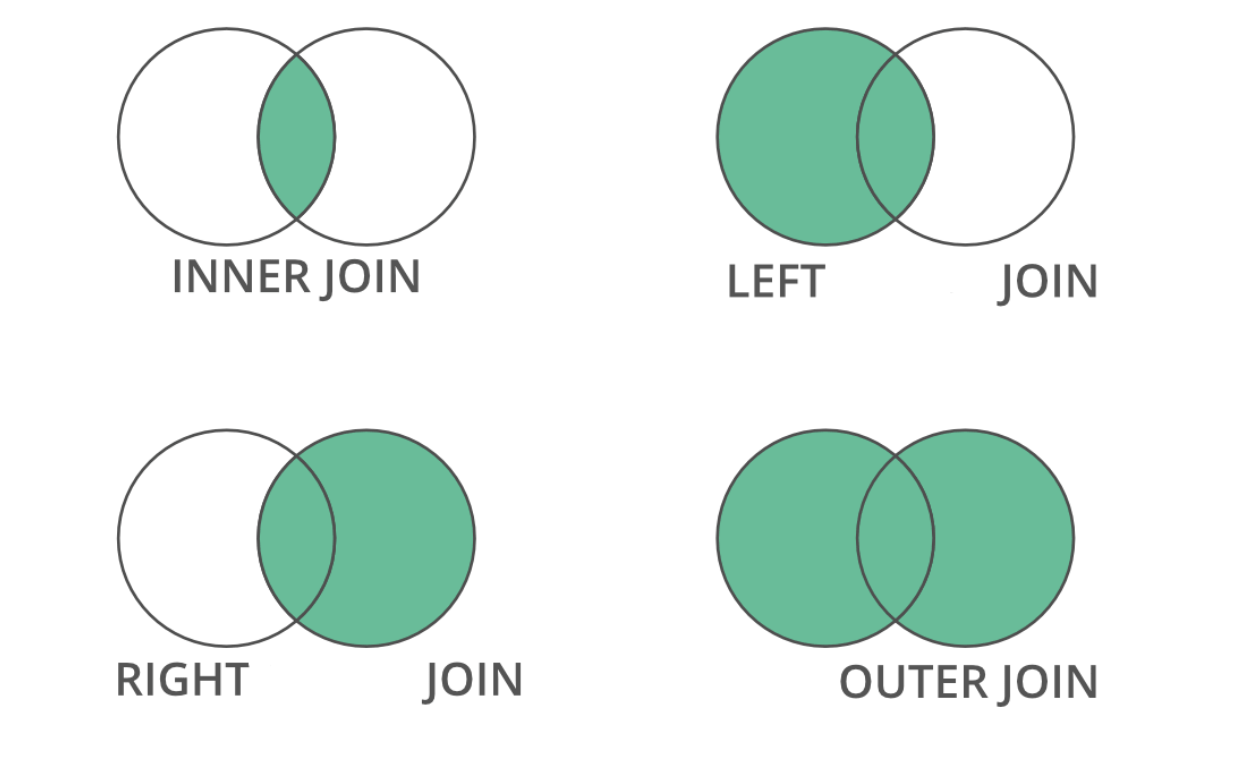

Suppose we have two tables: `df_1`and `df_2`

In [73]:
df_1 = pd.DataFrame({"Name": ["Andy","Bob","Charlie","Elsa","Felicia"], "Gender": ["M","M","M","F","F"]})
df_2 = pd.DataFrame({"Name": ["Andy","Bob","Damian","Elsa","Gertrude"], "Age": [15,23,27,18,46]})

print(df_1)
print(df_2)

      Name Gender
0     Andy      M
1      Bob      M
2  Charlie      M
3     Elsa      F
4  Felicia      F
       Name  Age
0      Andy   15
1       Bob   23
2    Damian   27
3      Elsa   18
4  Gertrude   46


In [76]:
# inner join
df_inner = pd.merge(df_1, df_2, on = "Name",how = "inner")
print(df_inner)

# left join
df_left = pd.merge(df_1, df_2, on =  "Name",how = "left")
print(df_left)

# right join
df_right = pd.merge(df_1, df_2, on =  "Name",how = "right")
print(df_right)

# outer join
df_outer = pd.merge(df_1, df_2, on =  "Name",how = "outer")
print(df_outer)

   Name Gender  Age
0  Andy      M   15
1   Bob      M   23
2  Elsa      F   18
      Name Gender   Age
0     Andy      M  15.0
1      Bob      M  23.0
2  Charlie      M   NaN
3     Elsa      F  18.0
4  Felicia      F   NaN
       Name Gender  Age
0      Andy      M   15
1       Bob      M   23
2      Elsa      F   18
3    Damian    NaN   27
4  Gertrude    NaN   46
       Name Gender   Age
0      Andy      M  15.0
1       Bob      M  23.0
2   Charlie      M   NaN
3      Elsa      F  18.0
4   Felicia      F   NaN
5    Damian    NaN  27.0
6  Gertrude    NaN  46.0


### §4.8 Concatenate Data in Pandas

Concatenate pandas objects together with `concat()`:

In [79]:
result = pd.concat([df_1, df_2])
print(result)

       Name Gender   Age
0      Andy      M   NaN
1       Bob      M   NaN
2   Charlie      M   NaN
3      Elsa      F   NaN
4   Felicia      F   NaN
0      Andy    NaN  15.0
1       Bob    NaN  23.0
2    Damian    NaN  27.0
3      Elsa    NaN  18.0
4  Gertrude    NaN  46.0


In [104]:
df1 = pd.DataFrame(
        {
            "A": ["A0", "A1", "A2", "A3"],
            "B": ["B0", "B1", "B2", "B3"],
            "C": ["C0", "C1", "C2", "C3"],
            "D": ["D0", "D1", "D2", "D3"],
        },
        index=[0, 1, 2, 3],
   )

df2 = pd.DataFrame(
        {
            "A": ["A0", "A5", "A6", "A7"],
            "B": ["B0", "B5", "B6", "B7"],
            "C": ["C0", "C5", "C6", "C7"],
            "D": ["D0", "D5", "D6", "D7"],
        },
        index=[4, 5, 6, 7],
    )

df3 = pd.DataFrame(
        {
            "A": ["A0", "A9", "A10", "A11"],
            "B": ["B0", "B9", "B10", "B11"],
            "C": ["C0", "C9", "C10", "C11"],
            "D": ["D0", "D9", "D10", "D11"],
        },
        index=[8, 9, 10, 11],
   )

frames = [df1, df2, df3]
result = pd.concat(frames)

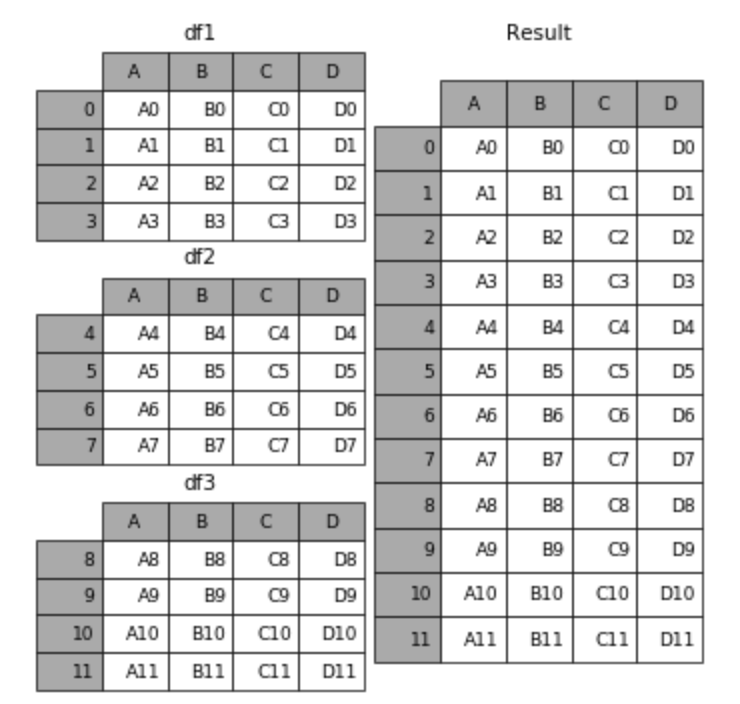

In [91]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B0,C0,D0
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A0,B0,C0,D0
9,A9,B9,C9,D9


It can be useful when we want to combine multiple files into one single file for our data analysis.

> Note:
It is worth noting that `concat()` (and therefore `append()`) makes a full copy of the data, and that constantly reusing this function can create a significant performance hit. If you need to use the operation over several datasets, use a list comprehension.

```python
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)
```

A useful shortcut to `concat()` are the `append()` instance methods on Series and DataFrame.

`append()` can take multiple objects to concatenate.

In [85]:
result = df1.append(df2)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [87]:
result = df1.append([df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### drop duplicate values

After joining, appending, merging, there might be duplicates that needs to be removed.
We can use `drop_duplicates()` to remove the duplicate rows.

In [92]:
result.drop_duplicates() #without resetting the index

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [106]:
result.drop_duplicates(inplace=False)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B0,C0,D0
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A0,B0,C0,D0
9,A9,B9,C9,D9


In [107]:
result.drop_duplicates(inplace=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [112]:
result.drop_duplicates(inplace=True)
result.reset_index(drop = True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A5,B5,C5,D5
5,A6,B6,C6,D6
6,A7,B7,C7,D7
7,A9,B9,C9,D9
8,A10,B10,C10,D10
9,A11,B11,C11,D11


### §4.9 Grouping Data in Pandas

In data analysis, we often need to answer business questions by summarizing data. For example,

"What is the department sales in Q1?"

"How many new customers we have acquired in the past year?"

"Which product saw the biggest increase during the past 6 months?". 

To answer these questions, we need to group the data by certain dimension(s) and calculate the metrics. By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [113]:
df = pd.DataFrame(
        {
            "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
            "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
            "C": np.random.randn(8),
            "D": np.random.randn(8),
        })
df

,A,B,C,D
0,foo,one,-1.470614,-0.229430
1,bar,one,-1.006207,0.542722
2,foo,two,-0.373272,0.168348
3,bar,three,-1.748963,0.469382
4,foo,two,-0.710232,0.288813
5,bar,two,-1.725154,-0.231459
6,foo,one,-0.573877,0.960085
7,foo,three,0.651692,1.973204


In [115]:
# Grouping by column A, and then applying the sum() function to the resulting groups.
df.groupby("A").sum()

,C,D
A,,
bar,-4.480323,0.780646
foo,-2.476303,3.161020


In [116]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.006207  0.542722
    three -1.748963  0.469382
    two   -1.725154 -0.231459
foo one   -2.044491  0.730655
    three  0.651692  1.973204
    two   -1.083504  0.457161

In [117]:
# Grouping by column A and apply the maximum function on column C.
df.groupby("A")["C"].max()

A
bar   -1.006207
foo    0.651692
Name: C, dtype: float64

In [119]:
# Grouping by column A and aggregating by multiple functions to find mean of column C and sum of column D
df.groupby(['A']).agg({'C':'mean', 'D':'sum'})

,C,D
A,,
bar,-1.493441,0.780646
foo,-0.495261,3.161020


>Bonus example: We can create a summary table using lambda functions to groupby and aggregate data by multiple functions

In [122]:
df = pd.DataFrame(
        data={
            "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
            "City": [
                "Toronto",
                "Montreal",
                "Vancouver",
                "Calgary",
                "Edmonton",
                "Winnipeg",
                "Windsor",
            ],
            "Sales": [13, 6, 16, 8, 4, 3, 1],
        })
df

,Province,City,Sales
0,ON,Toronto,13
1,QC,Montreal,6
2,BC,Vancouver,16
3,AL,Calgary,8
4,AL,Edmonton,4
5,MN,Winnipeg,3
6,ON,Windsor,1


In [124]:
df.groupby(['Province']).apply(lambda x: pd.Series({'Sales_sum': x['Sales'].sum(),
                                             'Sales_Max': x['Sales'].max(),
                                             'Sales_Min': x['Sales'].min(),
                                             'Sales_Avg': x['Sales'].mean(),
                                             'Sales_# of Unique': x['Sales'].nunique(),
                                             'Sales_Unique': x['Sales'].unique()}))

,Sales_sum,Sales_Max,Sales_Min,Sales_Avg,Sales_# of Unique,Sales_Unique
Province,,,,,,
AL,12,8,4,6.0,2,"[8, 4]"
BC,16,16,16,16.0,1,[16]
MN,3,3,3,3.0,1,[3]
ON,14,13,1,7.0,2,"[13, 1]"
QC,6,6,6,6.0,1,[6]


In [127]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

df = pd.DataFrame(
        {
            "ID": ["x%d" % r for r in range(10)],
            "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
            "ExamYear": [
                "2007",
                "2007",
                "2007",
                "2008",
                "2008",
                "2008",
                "2008",
                "2009",
                "2009",
                "2009",
            ],
            "Class": [
                "algebra",
                "stats",
                "bio",
                "algebra",
                "algebra",
                "stats",
                "stats",
                "algebra",
                "bio",
                "bio",
            ],
            "Participated": [
                "yes",
                "yes",
                "yes",
                "yes",
                "no",
                "yes",
                "yes",
                "yes",
                "yes",
                "yes",
            ],
            "Passed": ["yes" if x > 50 else "no" for x in grades],
            "Employed": [
                True,
                True,
                True,
                False,
                False,
                False,
                False,
                True,
                True,
                False,
            ],
            "Grade": grades,
        }
    )

df

,ID,Gender,ExamYear,Class,Participated,Passed,Employed,Grade
0,x0,F,2007,algebra,yes,no,True,48
1,x1,M,2007,stats,yes,yes,True,99
2,x2,F,2007,bio,yes,yes,True,75
3,x3,M,2008,algebra,yes,yes,False,80
4,x4,F,2008,algebra,no,no,False,42
5,x5,M,2008,stats,yes,yes,False,80
6,x6,F,2008,stats,yes,yes,False,72
7,x7,M,2009,algebra,yes,yes,True,68
8,x8,M,2009,bio,yes,no,True,36
9,x9,M,2009,bio,yes,yes,False,78


In [128]:
df.groupby("ExamYear").agg(
        {
            "Participated": lambda x: x.value_counts()["yes"],
            "Passed": lambda x: sum(x == "yes"),
            "Employed": lambda x: sum(x),
            "Grade": lambda x: sum(x) / len(x),
        }
    )

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


#### Pivot tables

In [126]:
table = pd.pivot_table(
        df,
        values=["Sales"],
        index=["Province"],
        columns=["City"],
        aggfunc=np.sum,
        margins=True)
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

### §4.10 Getting data in/out

We can use pandas to read files to extract data. pandas supports a wide range of file format, such as `csv`, `excel`,`json`, `HTML`, `SQL` and so on. You can refer to this [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#)

#### Read in CSV files

In [129]:
df = pd.read_csv("data/world-happiness-report.csv")

In [133]:
df.head(5)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [136]:
top_10_GDP = df.groupby('Country name')['Log GDP per capita'].mean().sort_values(ascending=False)[:10]
top_10_GDP

Country name
Luxembourg                   11.607091
Qatar                        11.507600
Singapore                    11.329000
Switzerland                  11.095400
Ireland                      11.064857
United Arab Emirates         11.059692
Norway                       11.039100
Kuwait                       10.974818
United States                10.956067
Hong Kong S.A.R. of China    10.888700
Name: Log GDP per capita, dtype: float64

#### write to csv file

In [138]:
top_10_GDP.to_csv('data/top10gdp_country.csv')

#### Read in multiple CSV files

The best way to combine multiple files into a single DataFrame is to read the individual frames one by one, put all of the individual frames into a list, and then combine the frames in the list using `pd.concat()`:

In [141]:
# generate sample csv files
for i in range(3):
        data = pd.DataFrame(np.random.randn(10, 4))
        data.to_csv("data/file_{}.csv".format(i), index = False)
    
files = ["data/file_0.csv", "data/file_1.csv", "data/file_2.csv"]

# concatenate files into single dataframe by putting all individual frames into a list
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

result

,0,1,2,3
0,0.282185,-0.139552,-1.557278,-0.969449
1,-0.497650,0.570473,0.271705,0.688198
2,-0.457065,1.678857,-0.698069,0.428507
3,-0.605105,-1.121335,-1.358280,1.494211
4,-0.836429,-0.041106,-1.128696,1.179221
5,-0.095970,0.627188,-1.848838,1.606021
6,1.401558,-0.084651,1.480089,0.522646
7,0.519557,1.262357,0.975609,1.409140
8,0.646192,1.185449,1.742993,-0.291489
9,-0.347313,-1.131411,1.583712,-0.223938


You can use the same approach to read all files matching a pattern. Here is an example using `glob`:

In [143]:
import glob
import os

files = glob.glob("data/file_*.csv")
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

result

,0,1,2,3
0,1.285066,0.486463,1.526122,-1.702625
1,-0.023493,0.299548,-0.196388,-1.706967
2,1.237739,-2.022593,0.039992,0.325529
3,-0.164754,0.466184,-2.055963,0.245804
4,-0.247464,-1.918546,1.284345,0.297037
5,-0.507594,-0.296510,0.465336,1.240981
6,1.237120,0.436280,-0.149680,0.561919
7,-0.913110,-1.159086,-0.626642,0.734589
8,0.300480,0.457298,0.972965,-2.281521
9,1.454220,-0.026436,1.100260,-0.222937


#### Read/Write excel files

In the most basic use-case, `read_excel` takes a path to an Excel file, and the `sheet_name` indicating which sheet to parse.

The `to_excel()` instance method is used for saving a DataFrame to Excel. Generally the semantics are similar to working with csv data.

```Python
pd.read_excel("path_to_file.xls", sheet_name="Sheet1")
```

In [158]:
apple_price = pd.read_excel('data/AAPL_excel.xls', sheet_name= 'AAPL')
apple_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600.0


### §4.11 Handle missing value

Before you start cleaning a data set, it’s a good idea to just get a general feel for the data. After that, you can put together a plan to clean the data.

- What are the features?
- What are the expected types (int, float, string, boolean)?
- Is there obvious missing data (values that Pandas can detect)?
- Is there other types of missing data that’s not so obvious (can’t easily detect with Pandas)?

Sources of Missing Values:
- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

For more details, you can refer to the [link](https://github.com/matthewbrems/ODSC-missing-data-may-18/blob/master/Analysis%20with%20Missing%20Data.pdf)

In [164]:
import pandas as pd

# Read csv file into a pandas dataframe
df = pd.read_csv("data/property_data.csv")

# Take a look at df
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [162]:
# Total missing values for each feature
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

#### Remove missing values

One way to handle missing values is to drop rows with na values.

In [163]:
df.dropna(how="any") #To drop any rows that have missing data.

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [166]:
df.dropna(subset=['PID', 'ST_NUM']) # drop rows that have missing data on columns PID or ST_NUM.

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


#### Impute data

A good strategy when dealing with missing values involves their replacement with another value. Usually, the following strategies are adopted:

- for numerical values replace the missing value with the mean or median of the column
- for categorial values replace the missing value with the most frequent value of the column

In [168]:
df['ST_NUM'].fillna(125, inplace=True) # Replace missing values with a number
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [171]:
# Replace using median 
median = df['ST_NUM'].median()
df['ST_NUM'].fillna(median, inplace=True)

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800
